In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [111]:
df=pd.read_csv("heart.csv")

In [113]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [115]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [117]:
df.duplicated().sum()

0

In [119]:
c= df['HeartDisease'].value_counts()
c

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [121]:
co = df.select_dtypes(include=['object']).columns.tolist()
co

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

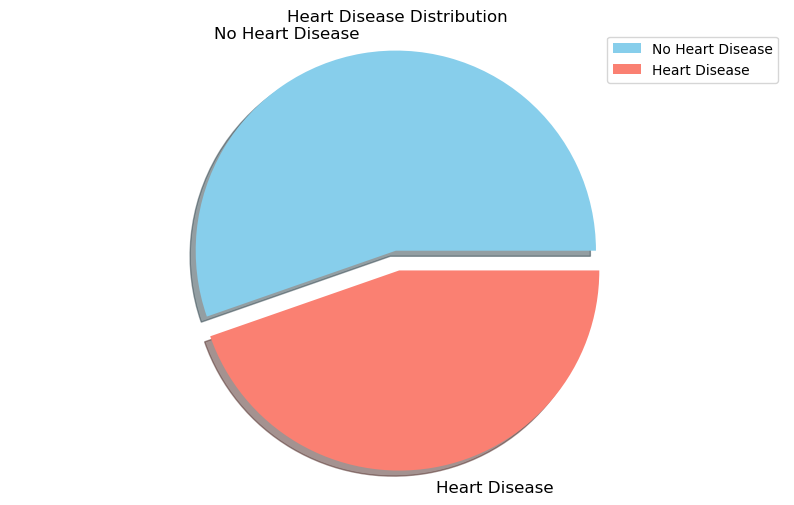

In [123]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon']
plt.pie(c, labels=['No Heart Disease', 'Heart Disease'], explode=(0, 0.1), shadow=True, textprops={'fontsize': 12},colors=colors)
plt.title('Heart Disease Distribution')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Heart Disease Distribution Based on Gender')

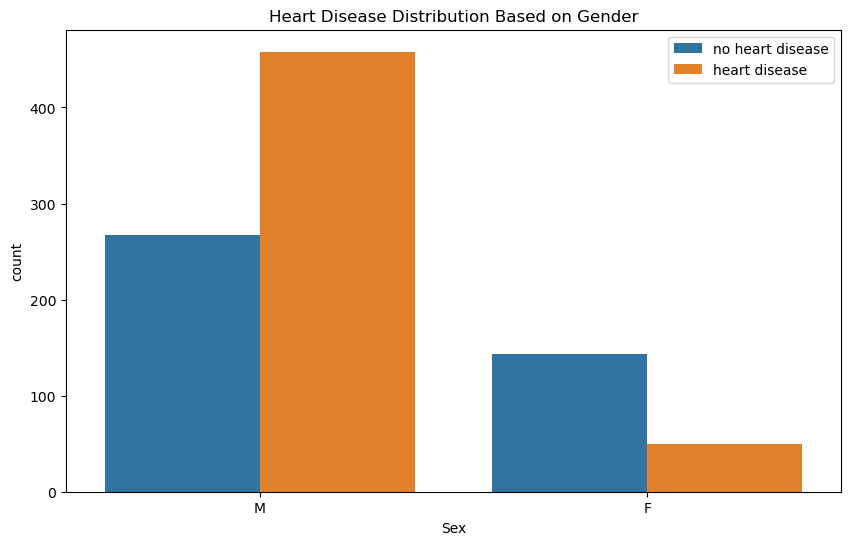

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", data=df,hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Gender')

Text(0.5, 1.0, 'Heart Disease Distribution Based on Chest Pain Type')

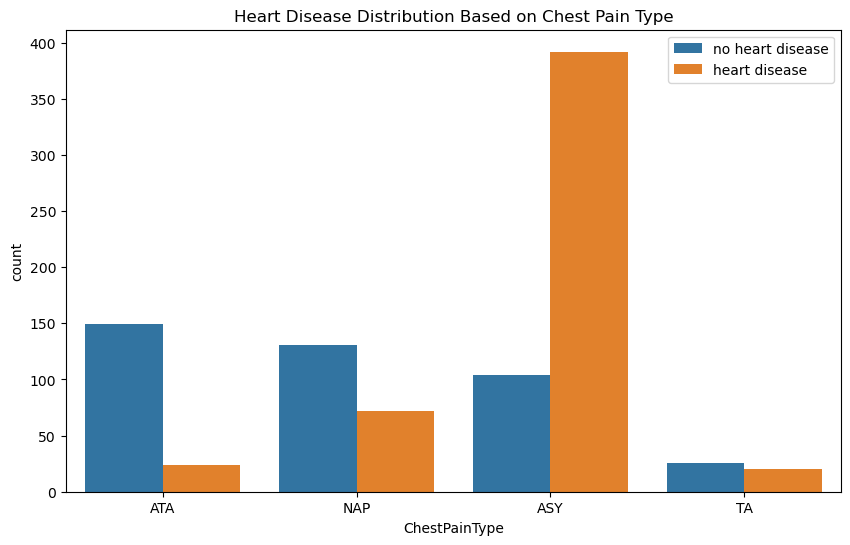

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x="ChestPainType", data=df, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Chest Pain Type')

Text(0.5, 1.0, 'Heart Disease Distribution Based on RestingECG')

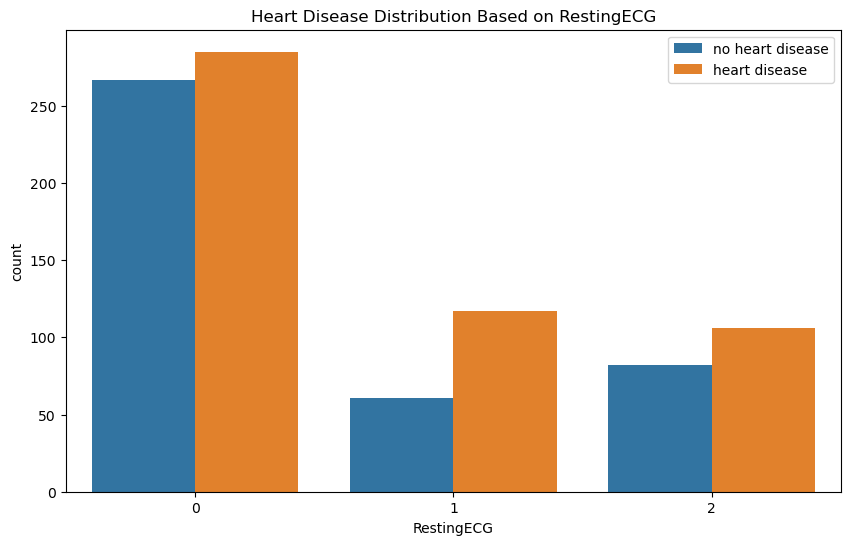

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x="RestingECG", data=df, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on RestingECG')

Text(0.5, 1.0, 'Heart Disease Distribution Based on Exercise Angina ')

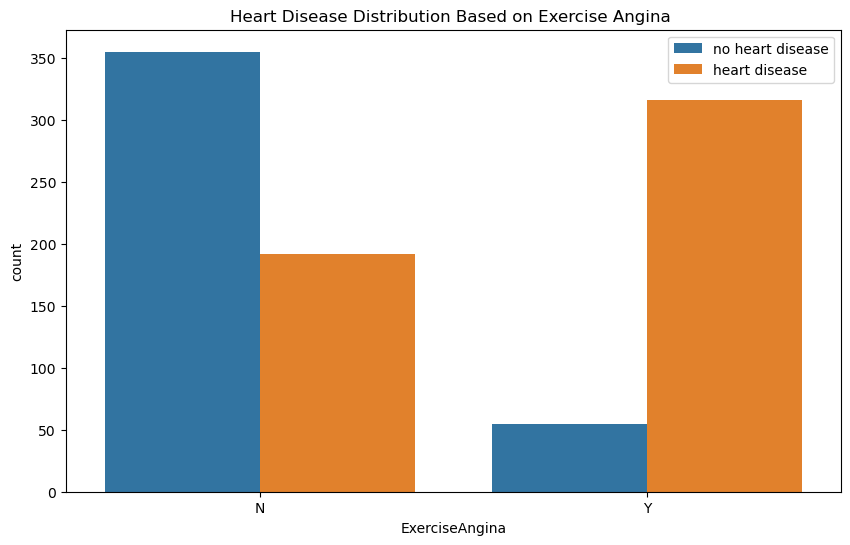

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x="ExerciseAngina", data=data, hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Exercise Angina ')

<Axes: >

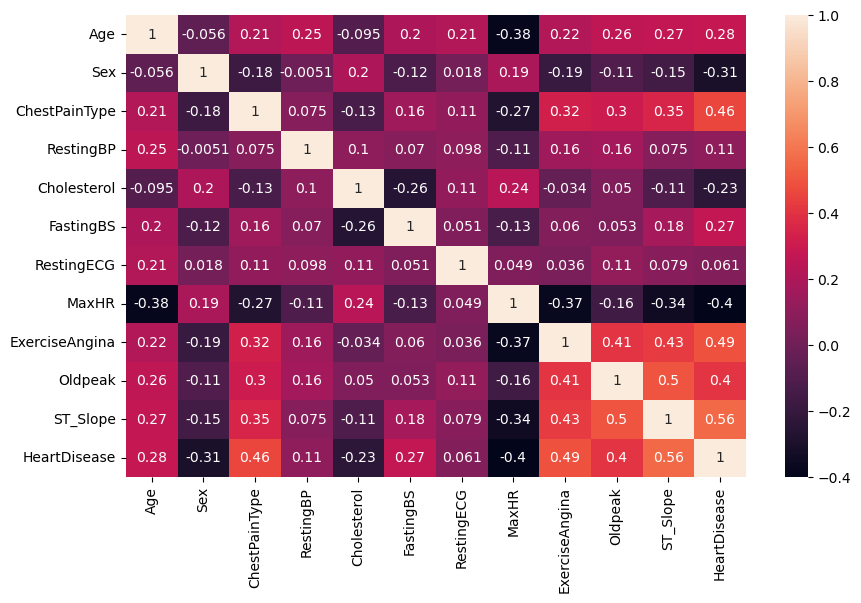

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [125]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [127]:
df.Sex = df.Sex.map({'M':0,'F':1})

In [129]:
df.ChestPainType = df.ChestPainType.map({'ATA':0,'NAP':1,'ASY':2,'TA':3})

In [131]:
df.RestingECG = df.RestingECG.map({'Normal':0,'ST':1,'LVH':2})

In [153]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [139]:
X=data.drop('HeartDisease', axis=1)
y=data['HeartDisease']

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
X_train = pd.get_dummies(X_train, columns=['ExerciseAngina', 'ST_Slope'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['ExerciseAngina', 'ST_Slope'], drop_first=True)

In [169]:
models = {
    "Support Vector Machine": SVC(kernel="rbf", C=1.0, gamma="scale"),  # Radial basis kernel
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion="gini"),
    "Random Forest": RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split=10, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski")
}

In [185]:
modelAccuracy= {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    modelAccuracy[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")

best_model_name = max(modelAccuracy, key=modelAccuracy.get)
best_model = models[best_model_name]

print(f"\nThe best model is {best_model_name} with an accuracy of {modelAccuracy[best_model_name]:.2f}")


Support Vector Machine Accuracy: 0.68
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.88
K-Nearest Neighbors Accuracy: 0.71

The best model is Random Forest with an accuracy of 0.88


In [197]:
def predict_heart_disease(input_data):
    feature_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 
                       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 
                       'Oldpeak', 'ST_Slope'] 
    
    input_df = pd.DataFrame([input_data], columns=feature_columns)
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    
    input_df = input_df[X_train.columns] 
    
    prediction = best_model.predict(input_df)
    return "Heart Disease" if prediction[0] == 1 else "No Heart Disease"


In [195]:
input= {
    'Age': 50,
    'Sex': 1, 
    'ChestPainType': 2,
    'RestingBP': 120,
    'Cholesterol': 200,
    'FastingBS': 0,
    'RestingECG': 1,
    'MaxHR': 150,
    'ExerciseAngina': 0,
    'Oldpeak': 1.0,
    'ST_Slope': 2
}

result = predict_heart_disease(input)
print("Prediction:", result)


Prediction: No Heart Disease
